# AstroGraphAnomaly — Showcase plots

Objectif: lancer un run puis générer la suite de plots "top" via `tools/showcase_plots.py`.


In [1]:
!git clone --depth 1 https://github.com/dalozedidier-dot/AstroGraphAnomaly.git
%cd AstroGraphAnomaly
!python -m pip install -q --upgrade pip
!pip -q install -r requirements.txt


Cloning into 'AstroGraphAnomaly'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 109 (delta 8), reused 84 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 12.92 MiB | 7.63 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/AstroGraphAnomaly
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
# Run pipeline offline
import os

!mkdir -p results/showcase_run
if os.path.exists('workflow.py'):
  !python workflow.py csv --in-csv data/sample_gaia_like.csv --out results/showcase_run --top-k 30 --knn-k 8 --plots --explain-top 5 --features-mode extended
else:
  !python run_workflow.py --mode csv --in-csv data/sample_gaia_like.csv --out results/showcase_run --top-k 30 --knn-k 8 --plots --explain-top 5 --features-mode extended

/content/AstroGraphAnomaly/src/astrographanomaly/reporting/plots.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [4]:
!ls -la screenshots

total 12
drwxr-xr-x  2 root root 4096 Feb  8 17:43 .
drwxr-xr-x 14 root root 4096 Feb  8 17:44 ..
-rw-r--r--  1 root root    0 Feb  8 17:43 .gitkeep
-rw-r--r--  1 root root   67 Feb  8 17:43 README.md


In [5]:
# Generate showcase plots
!python tools/showcase_plots.py --scored results/showcase_run/scored.csv --graph results/showcase_run/graph_full.graphml --out results/showcase_run --top-k 30 --write-enriched --copy-to-screenshots screenshots
!ls -la results/showcase_run/plots | sed -n '1,200p'


OK: wrote 18 PNG -> results/showcase_run/plots
total 5808
drwxr-xr-x 2 root root    4096 Feb  8 17:51 .
drwxr-xr-x 3 root root    4096 Feb  8 17:50 ..
-rw-r--r-- 1 root root   66900 Feb  8 17:51 betweenness_hist.png
-rw-r--r-- 1 root root   31662 Feb  8 17:50 cmd_bp_rp_vs_g.png
-rw-r--r-- 1 root root   68077 Feb  8 17:51 community_sizes.png
-rw-r--r-- 1 root root   73955 Feb  8 17:51 degree_hist.png
-rw-r--r-- 1 root root   64487 Feb  8 17:51 distance_hist.png
-rw-r--r-- 1 root root 1683096 Feb  8 17:51 graph_communities_anomalies.png
-rw-r--r-- 1 root root   69474 Feb  8 17:51 kcore_hist.png
-rw-r--r-- 1 root root  758505 Feb  8 17:50 mag_vs_distance.png
-rw-r--r-- 1 root root  103569 Feb  8 17:51 mean_features_anom_vs_normal.png
-rw-r--r-- 1 root root   69504 Feb  8 17:51 parallax_hist.png
-rw-r--r-- 1 root root  598306 Feb  8 17:51 pca_2d.png
-rw-r--r-- 1 root root  237178 Feb  8 17:51 pmra_pmdec_score.png
-rw-r--r-- 1 root root  985620 Feb  8 17:50 ra_dec_score.png
-rw-r--r-- 1 roo

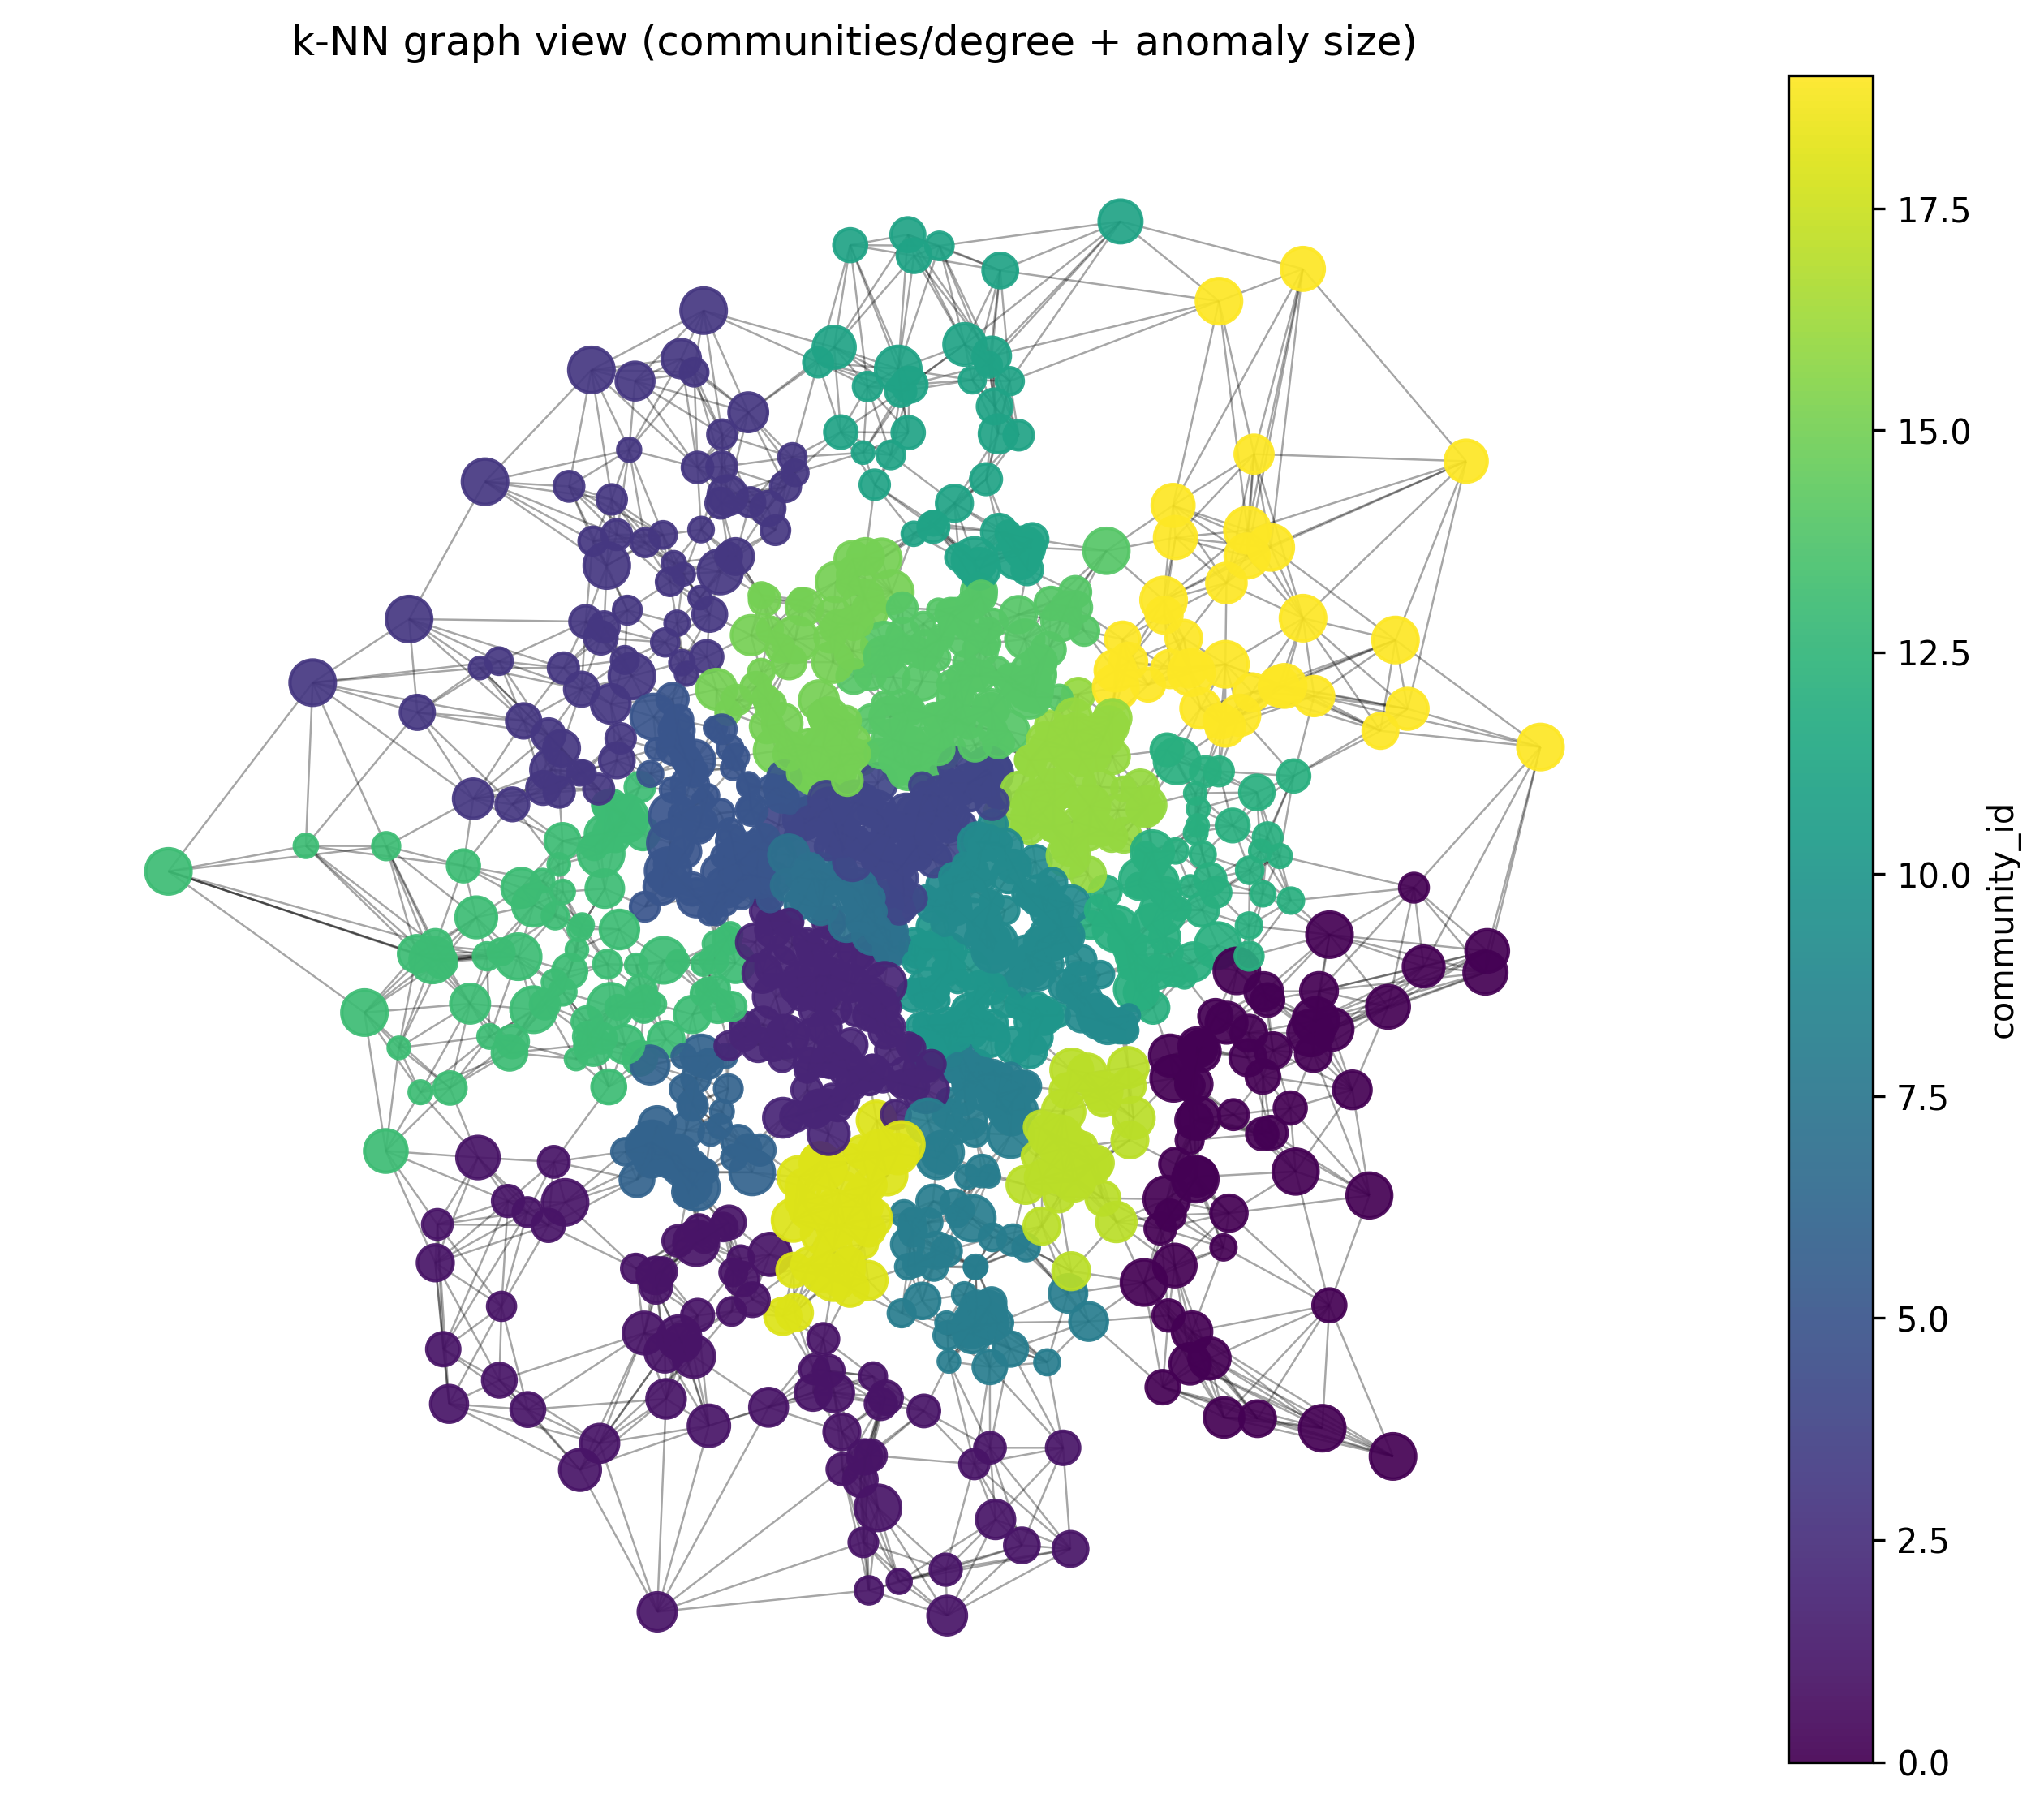

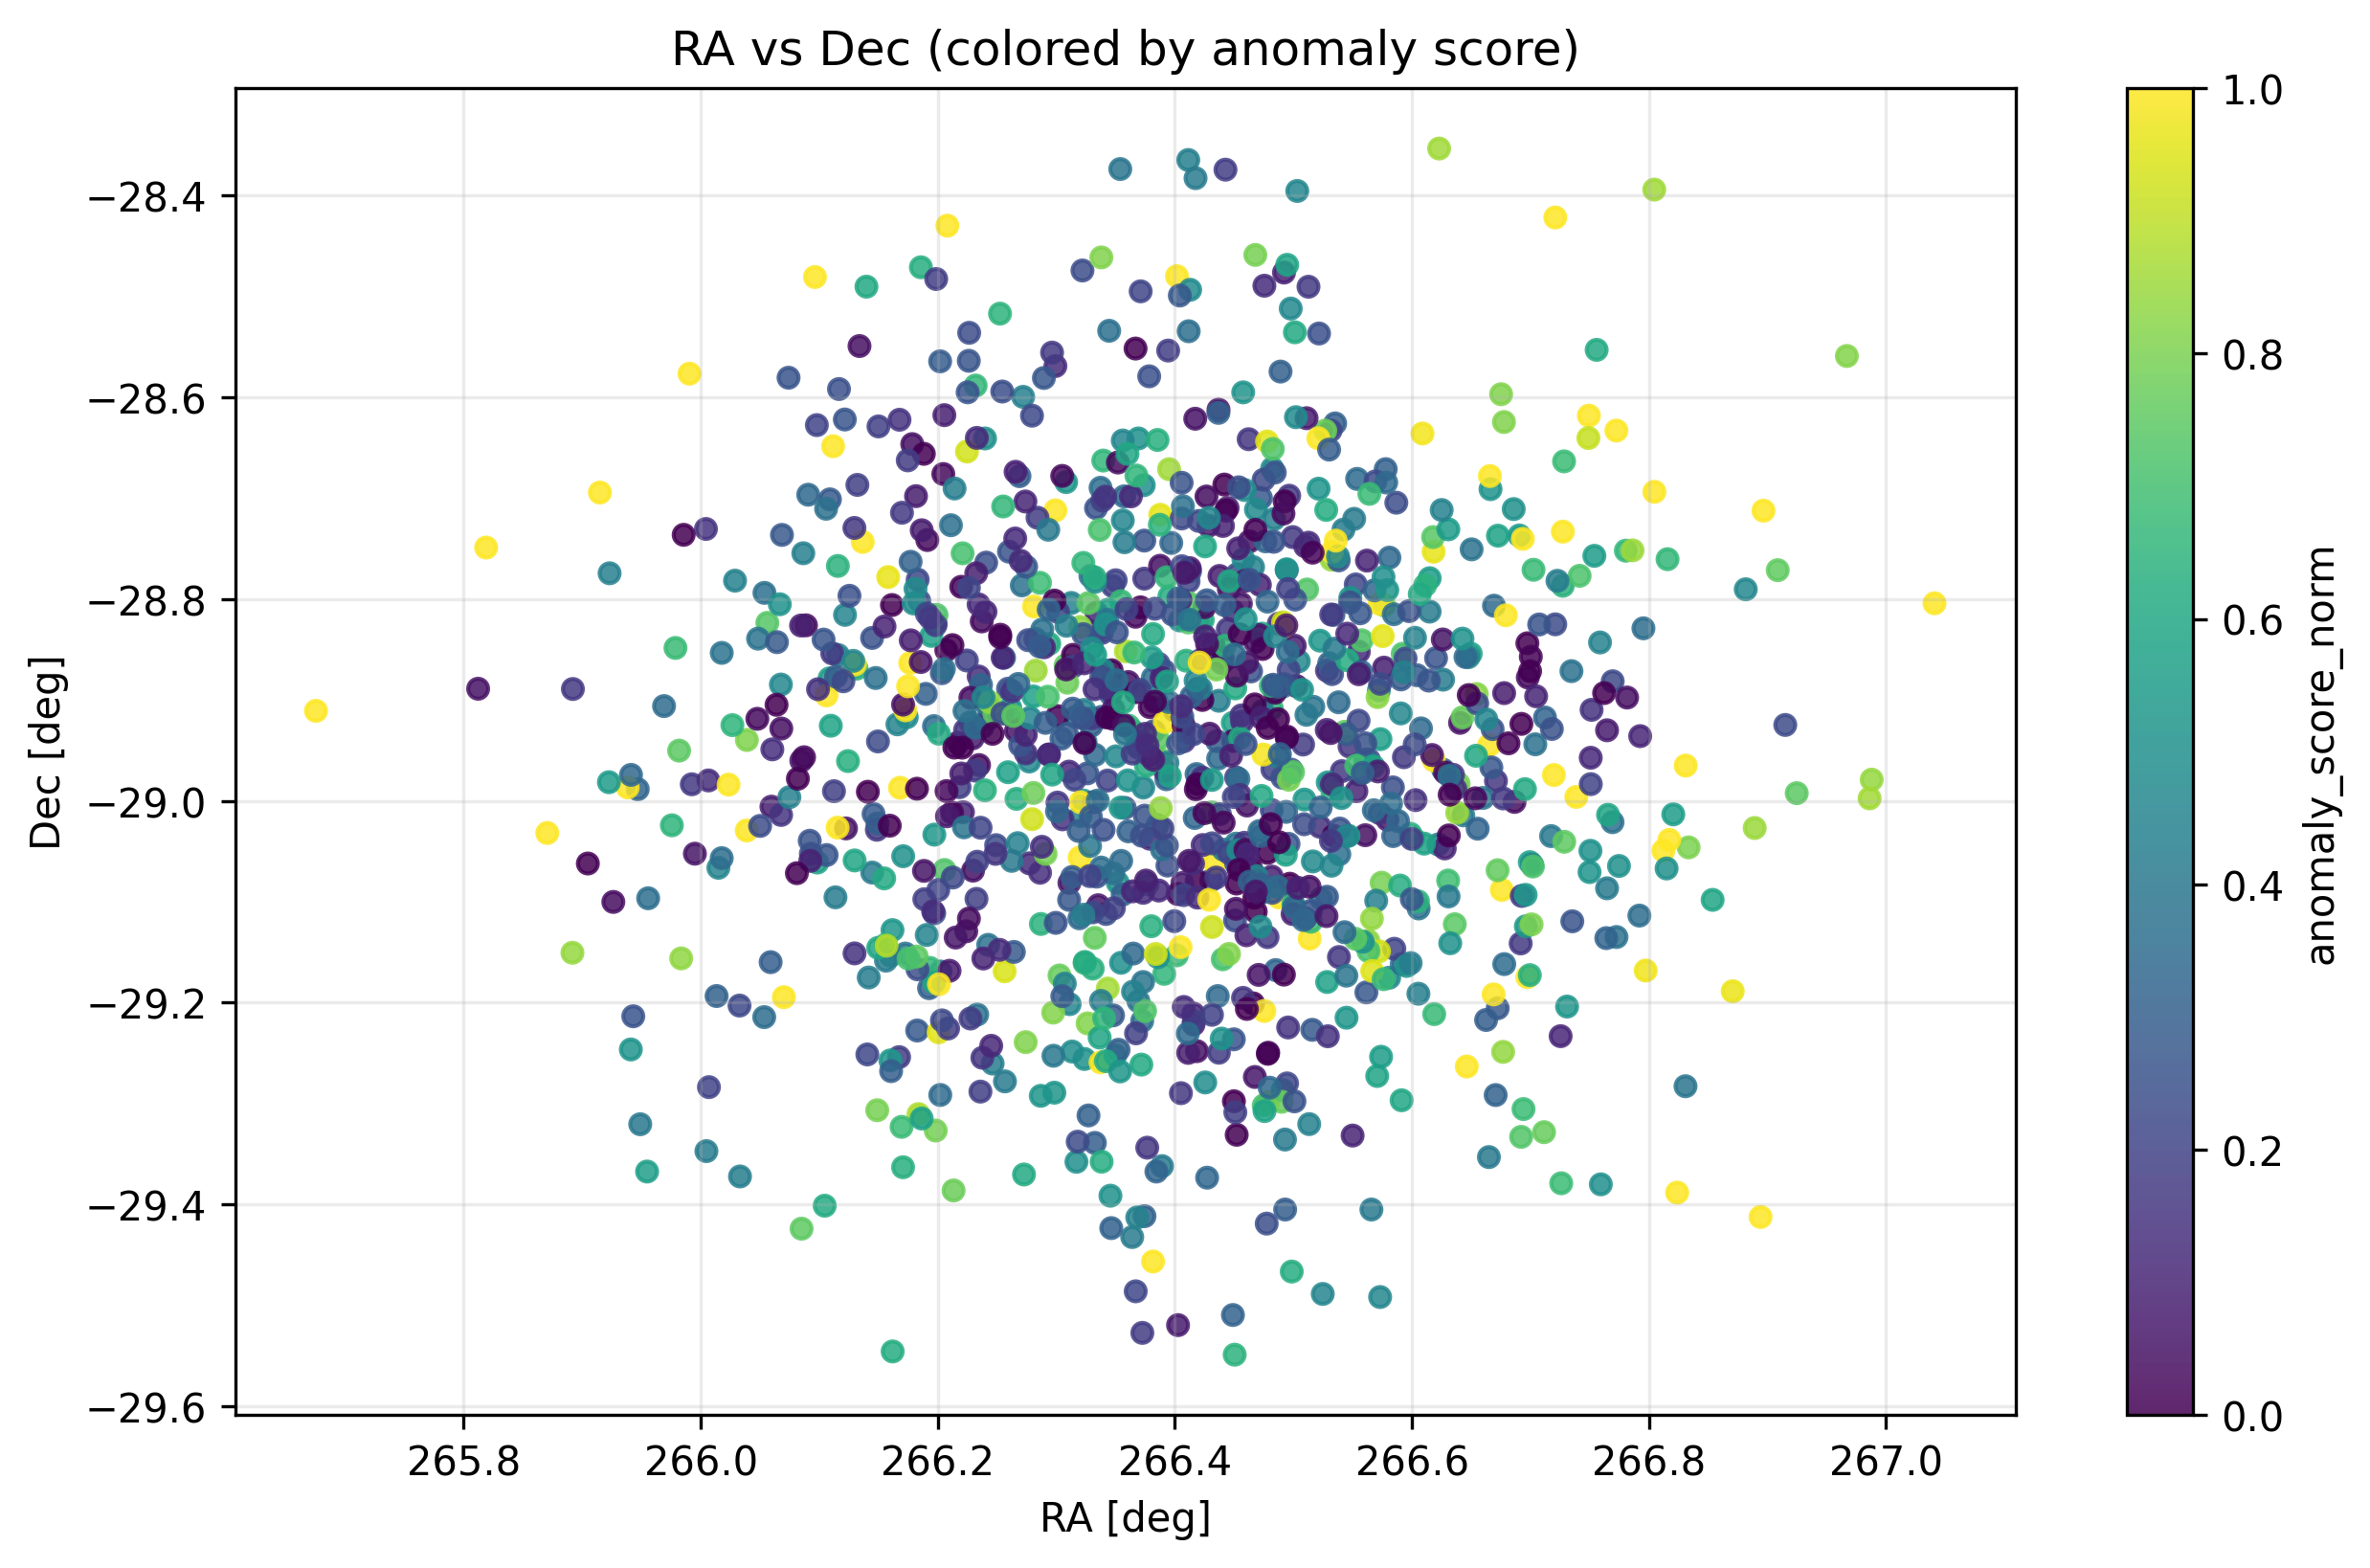

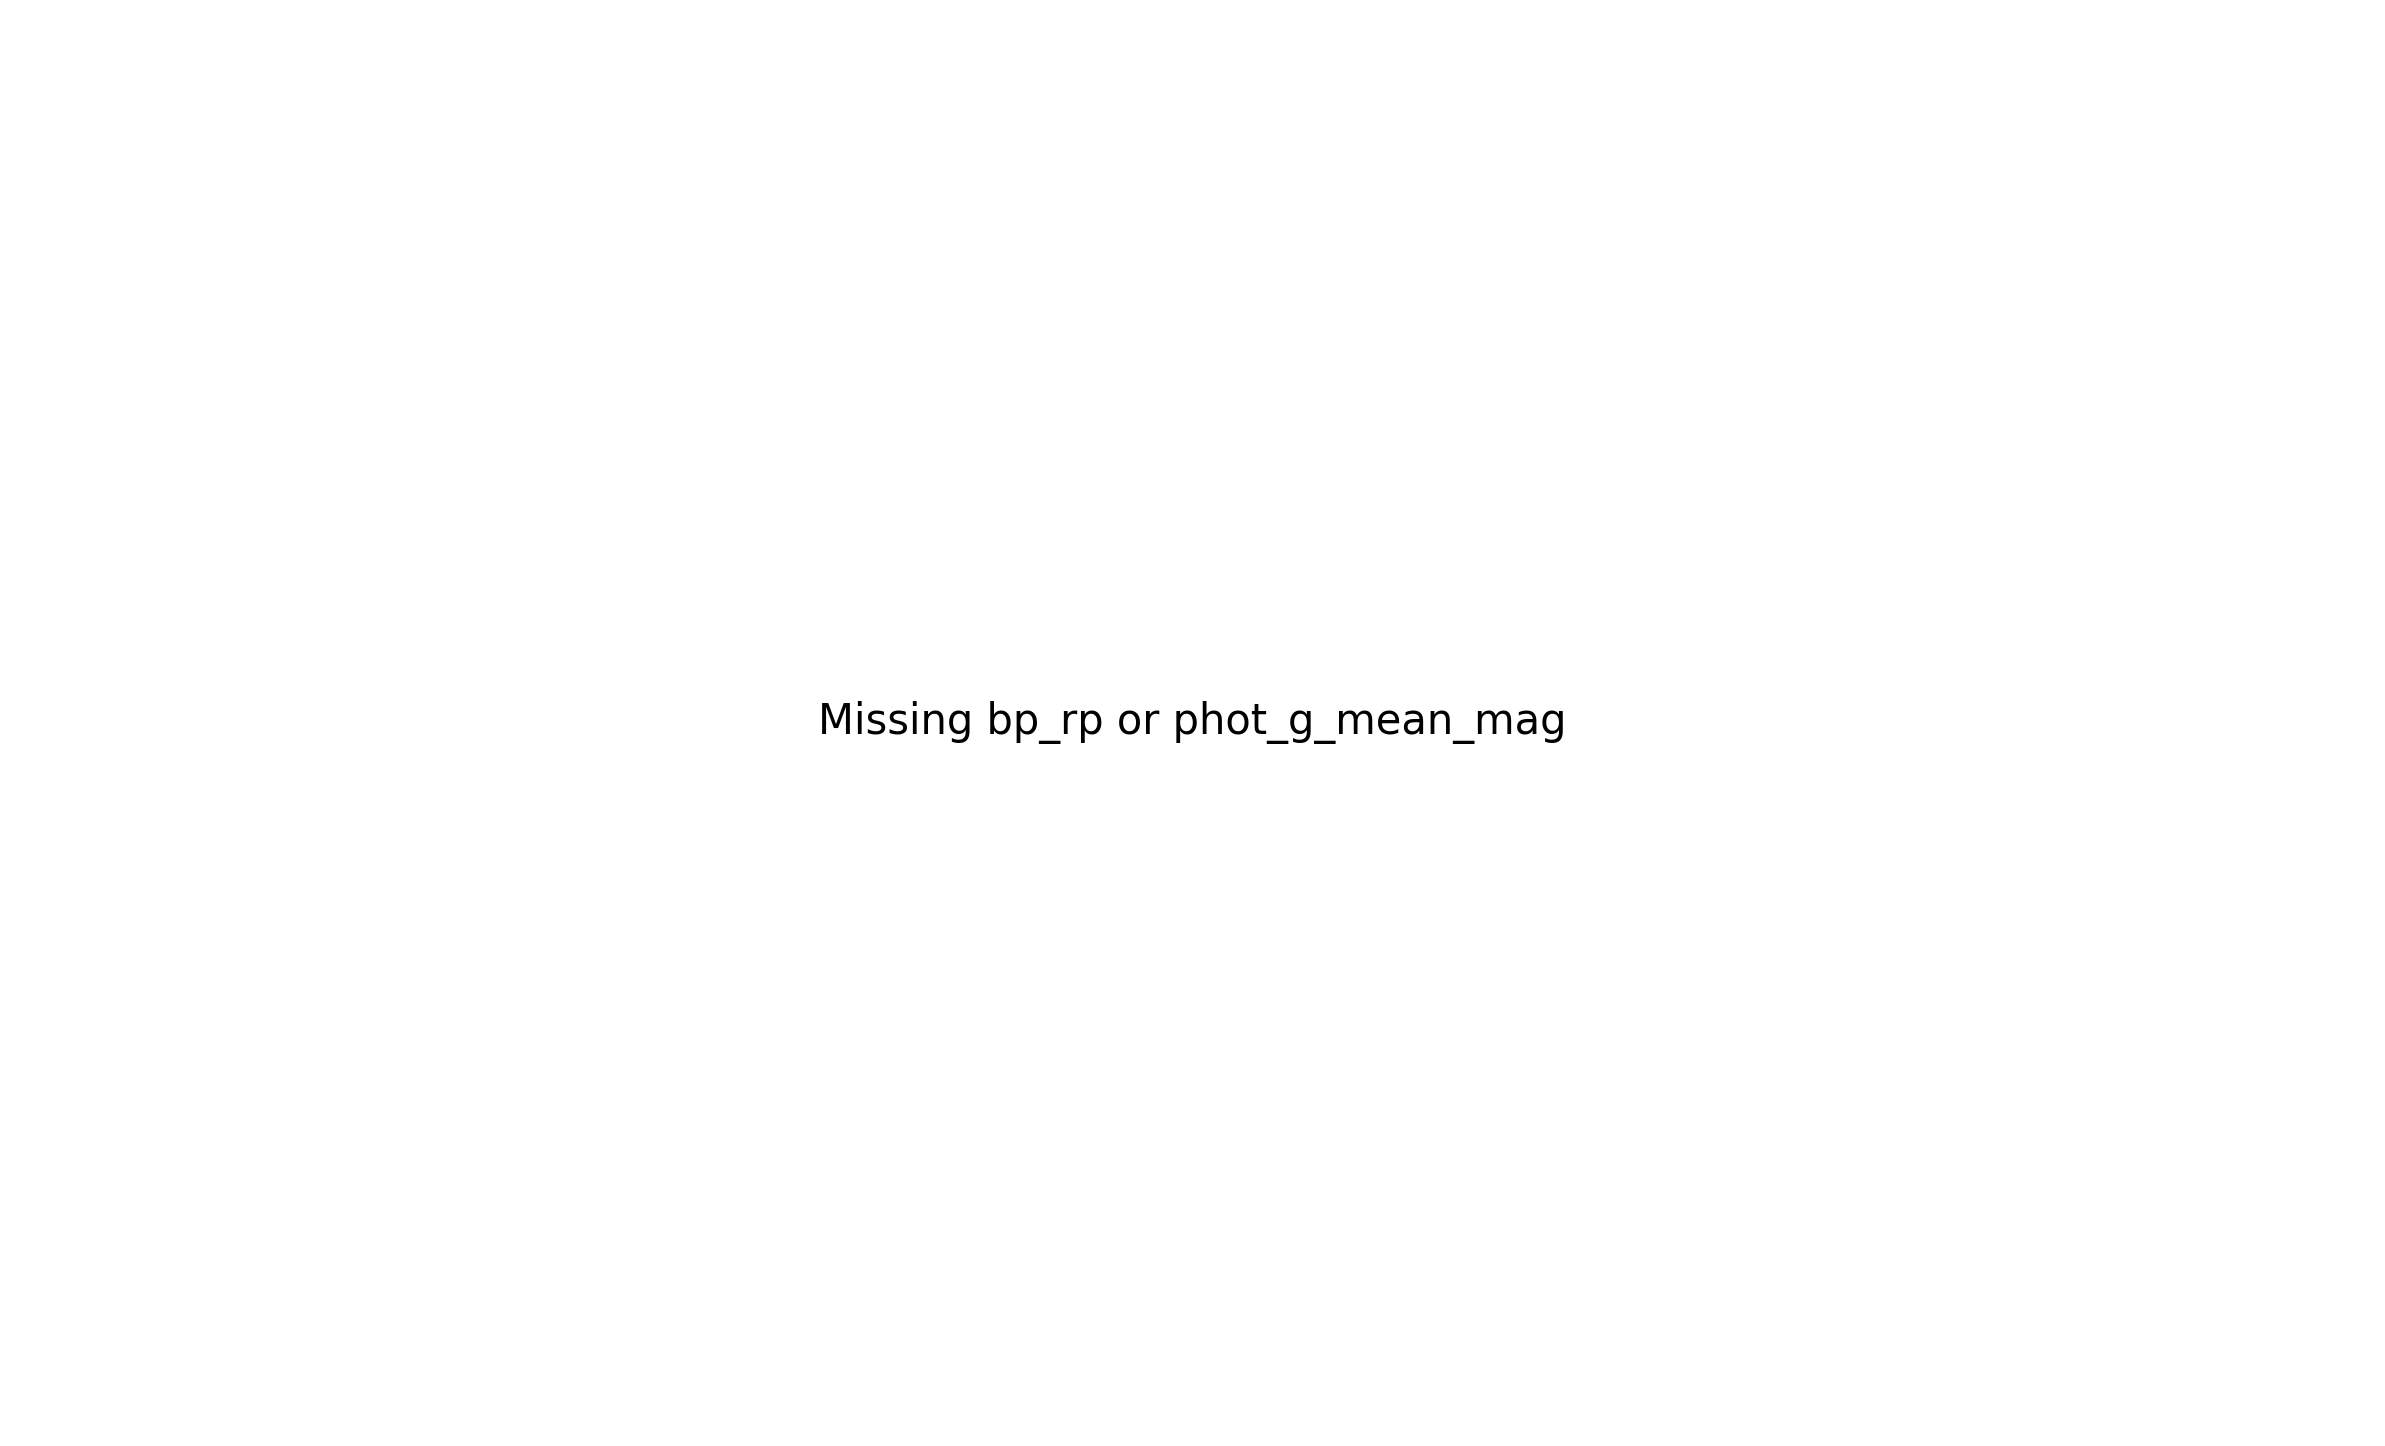

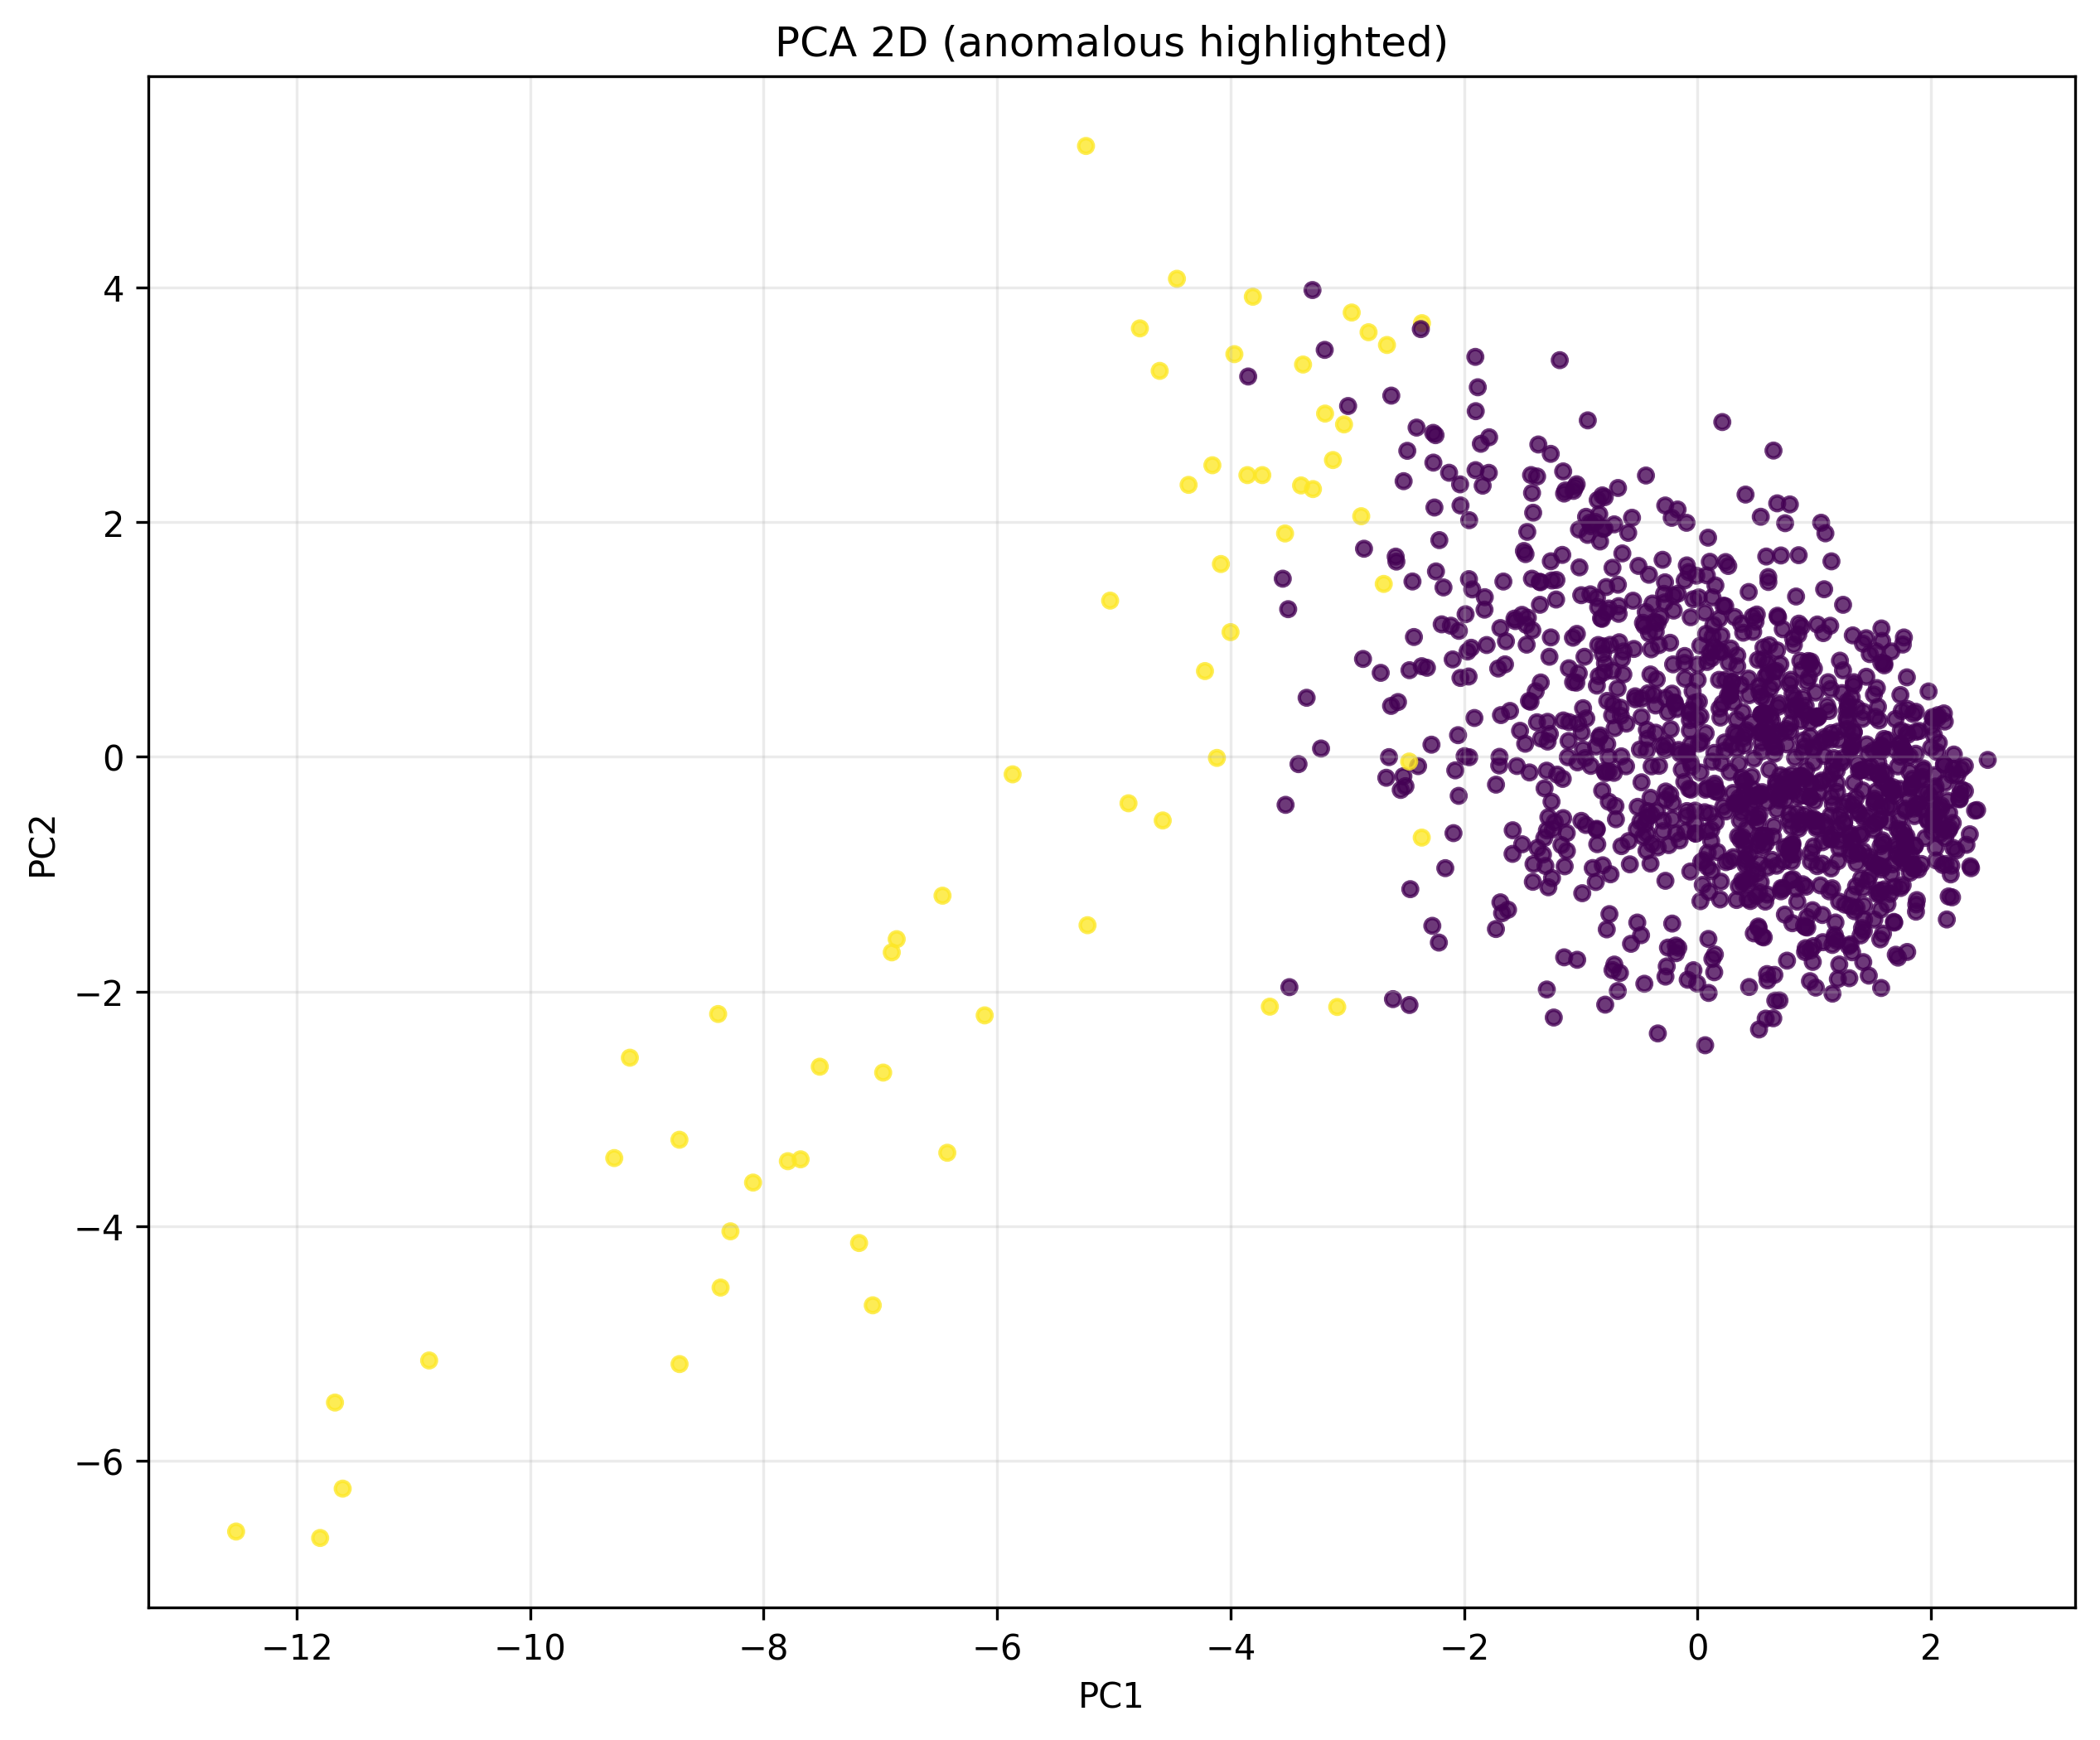

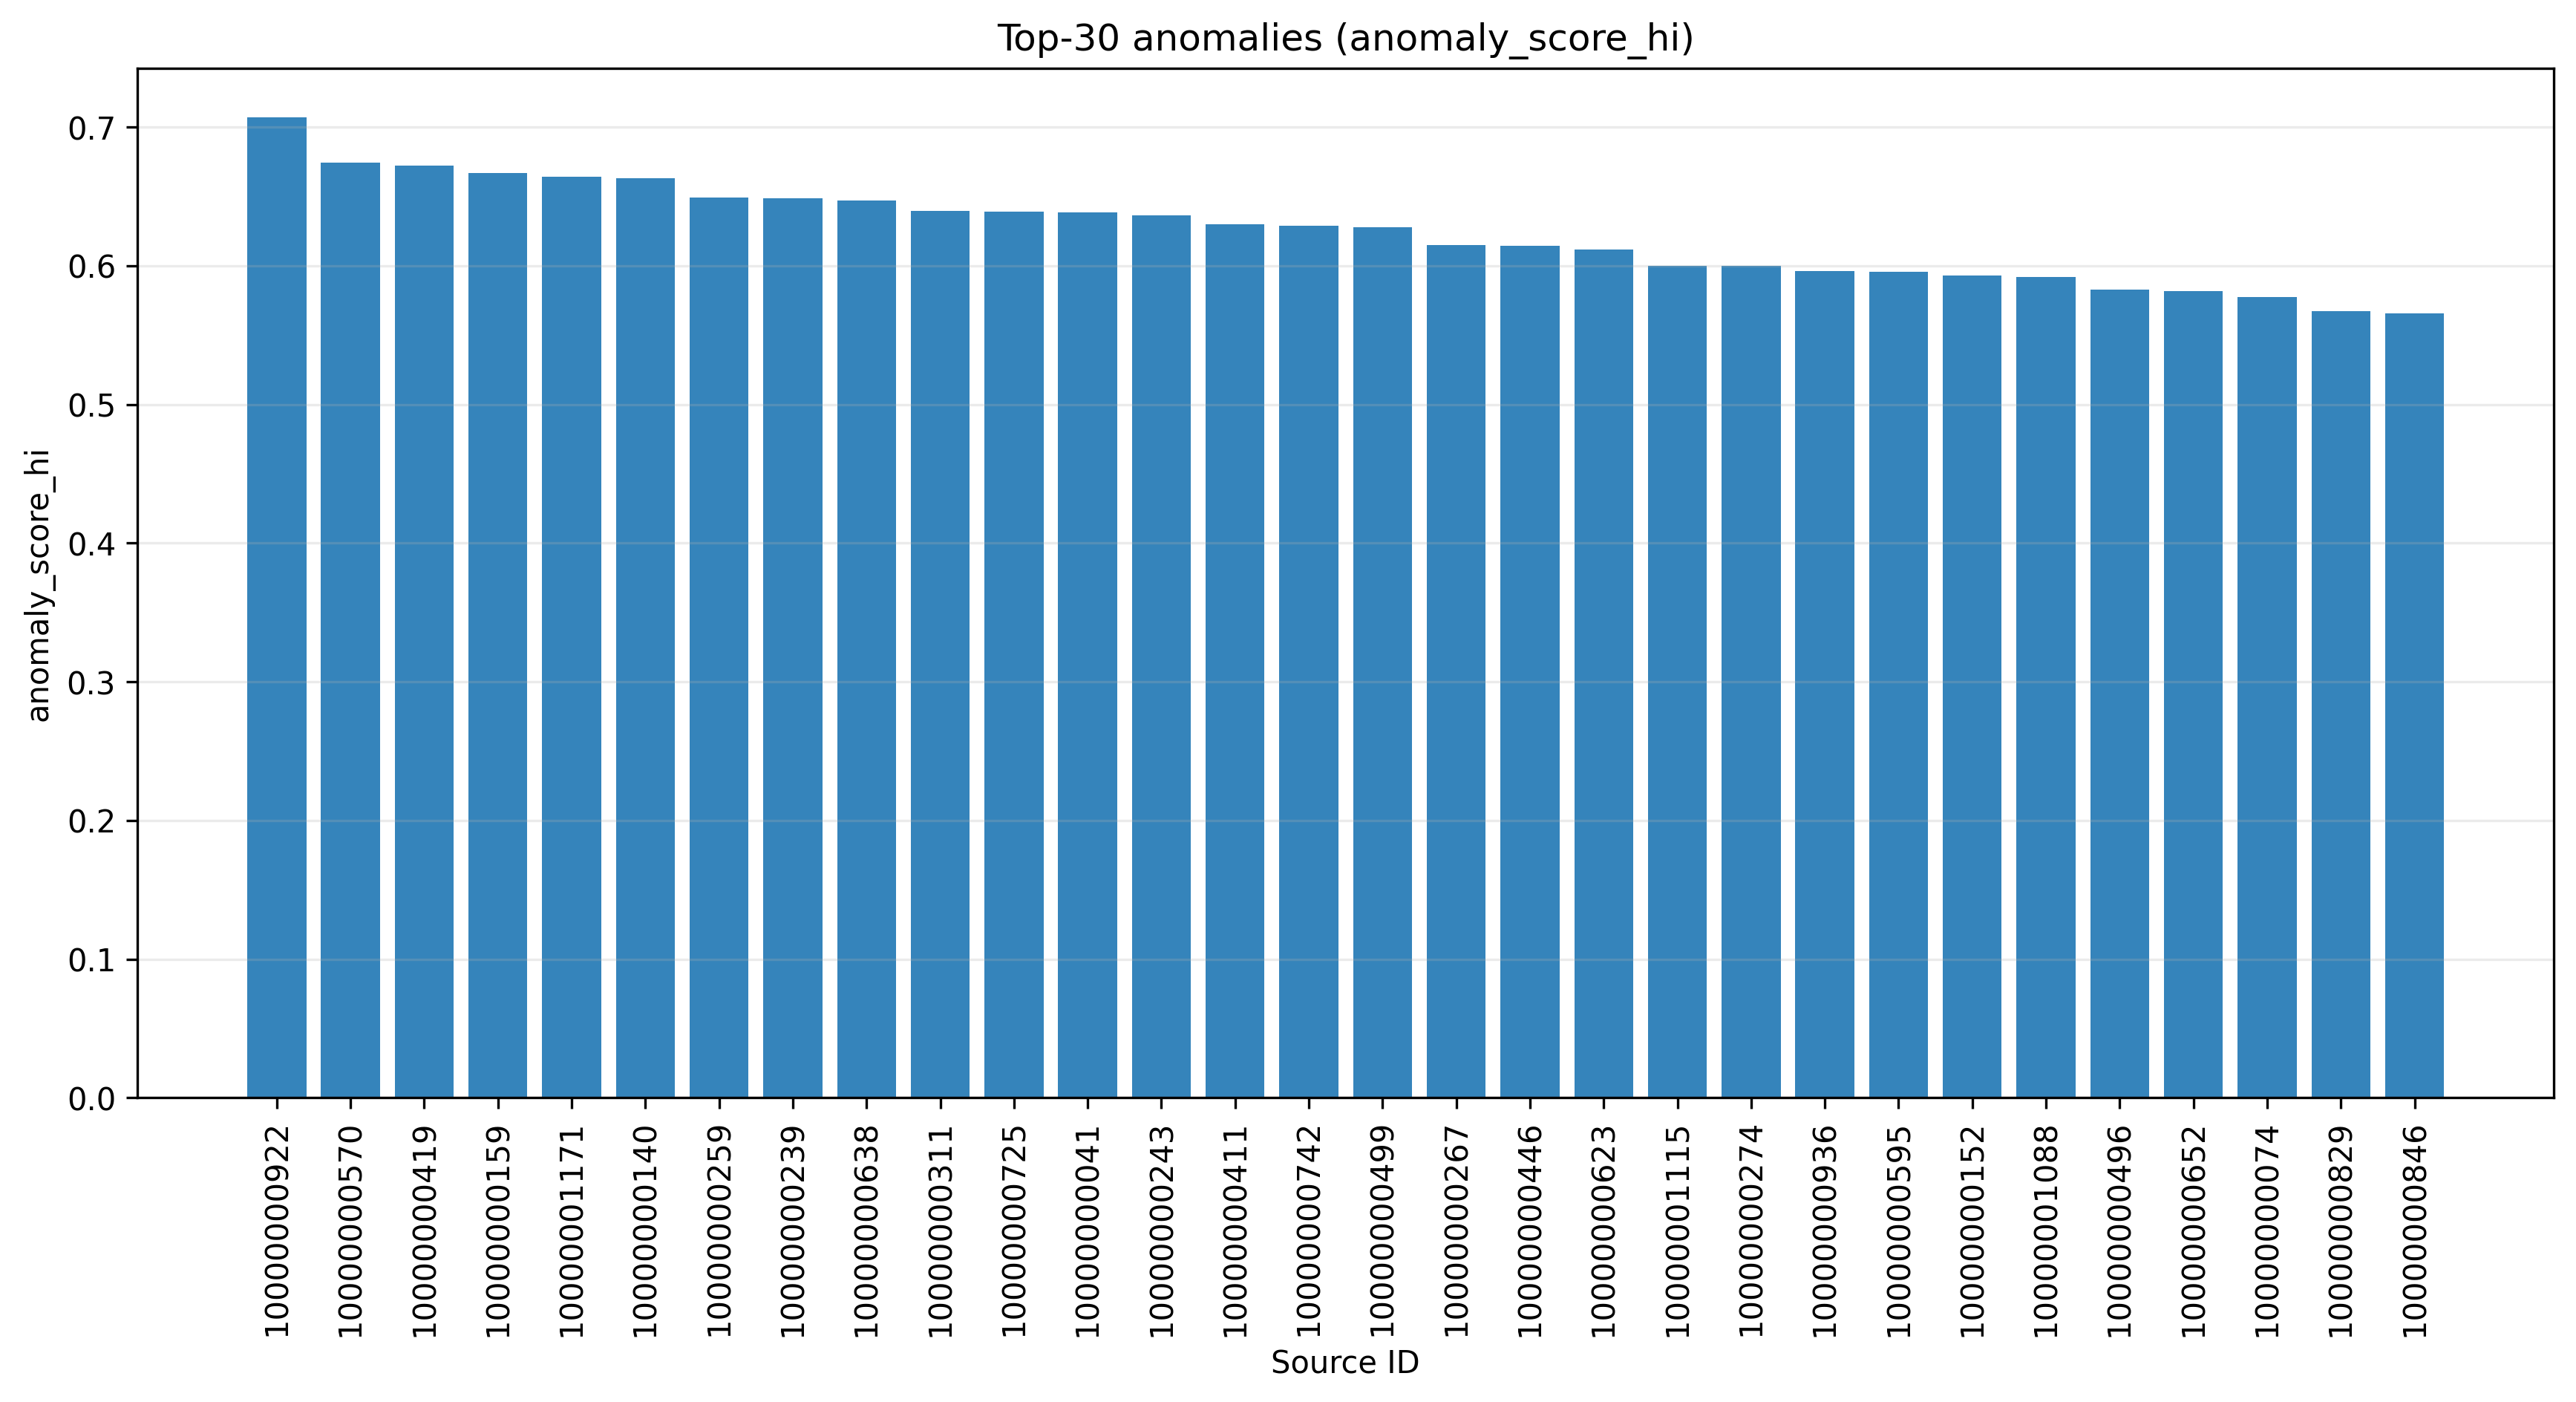

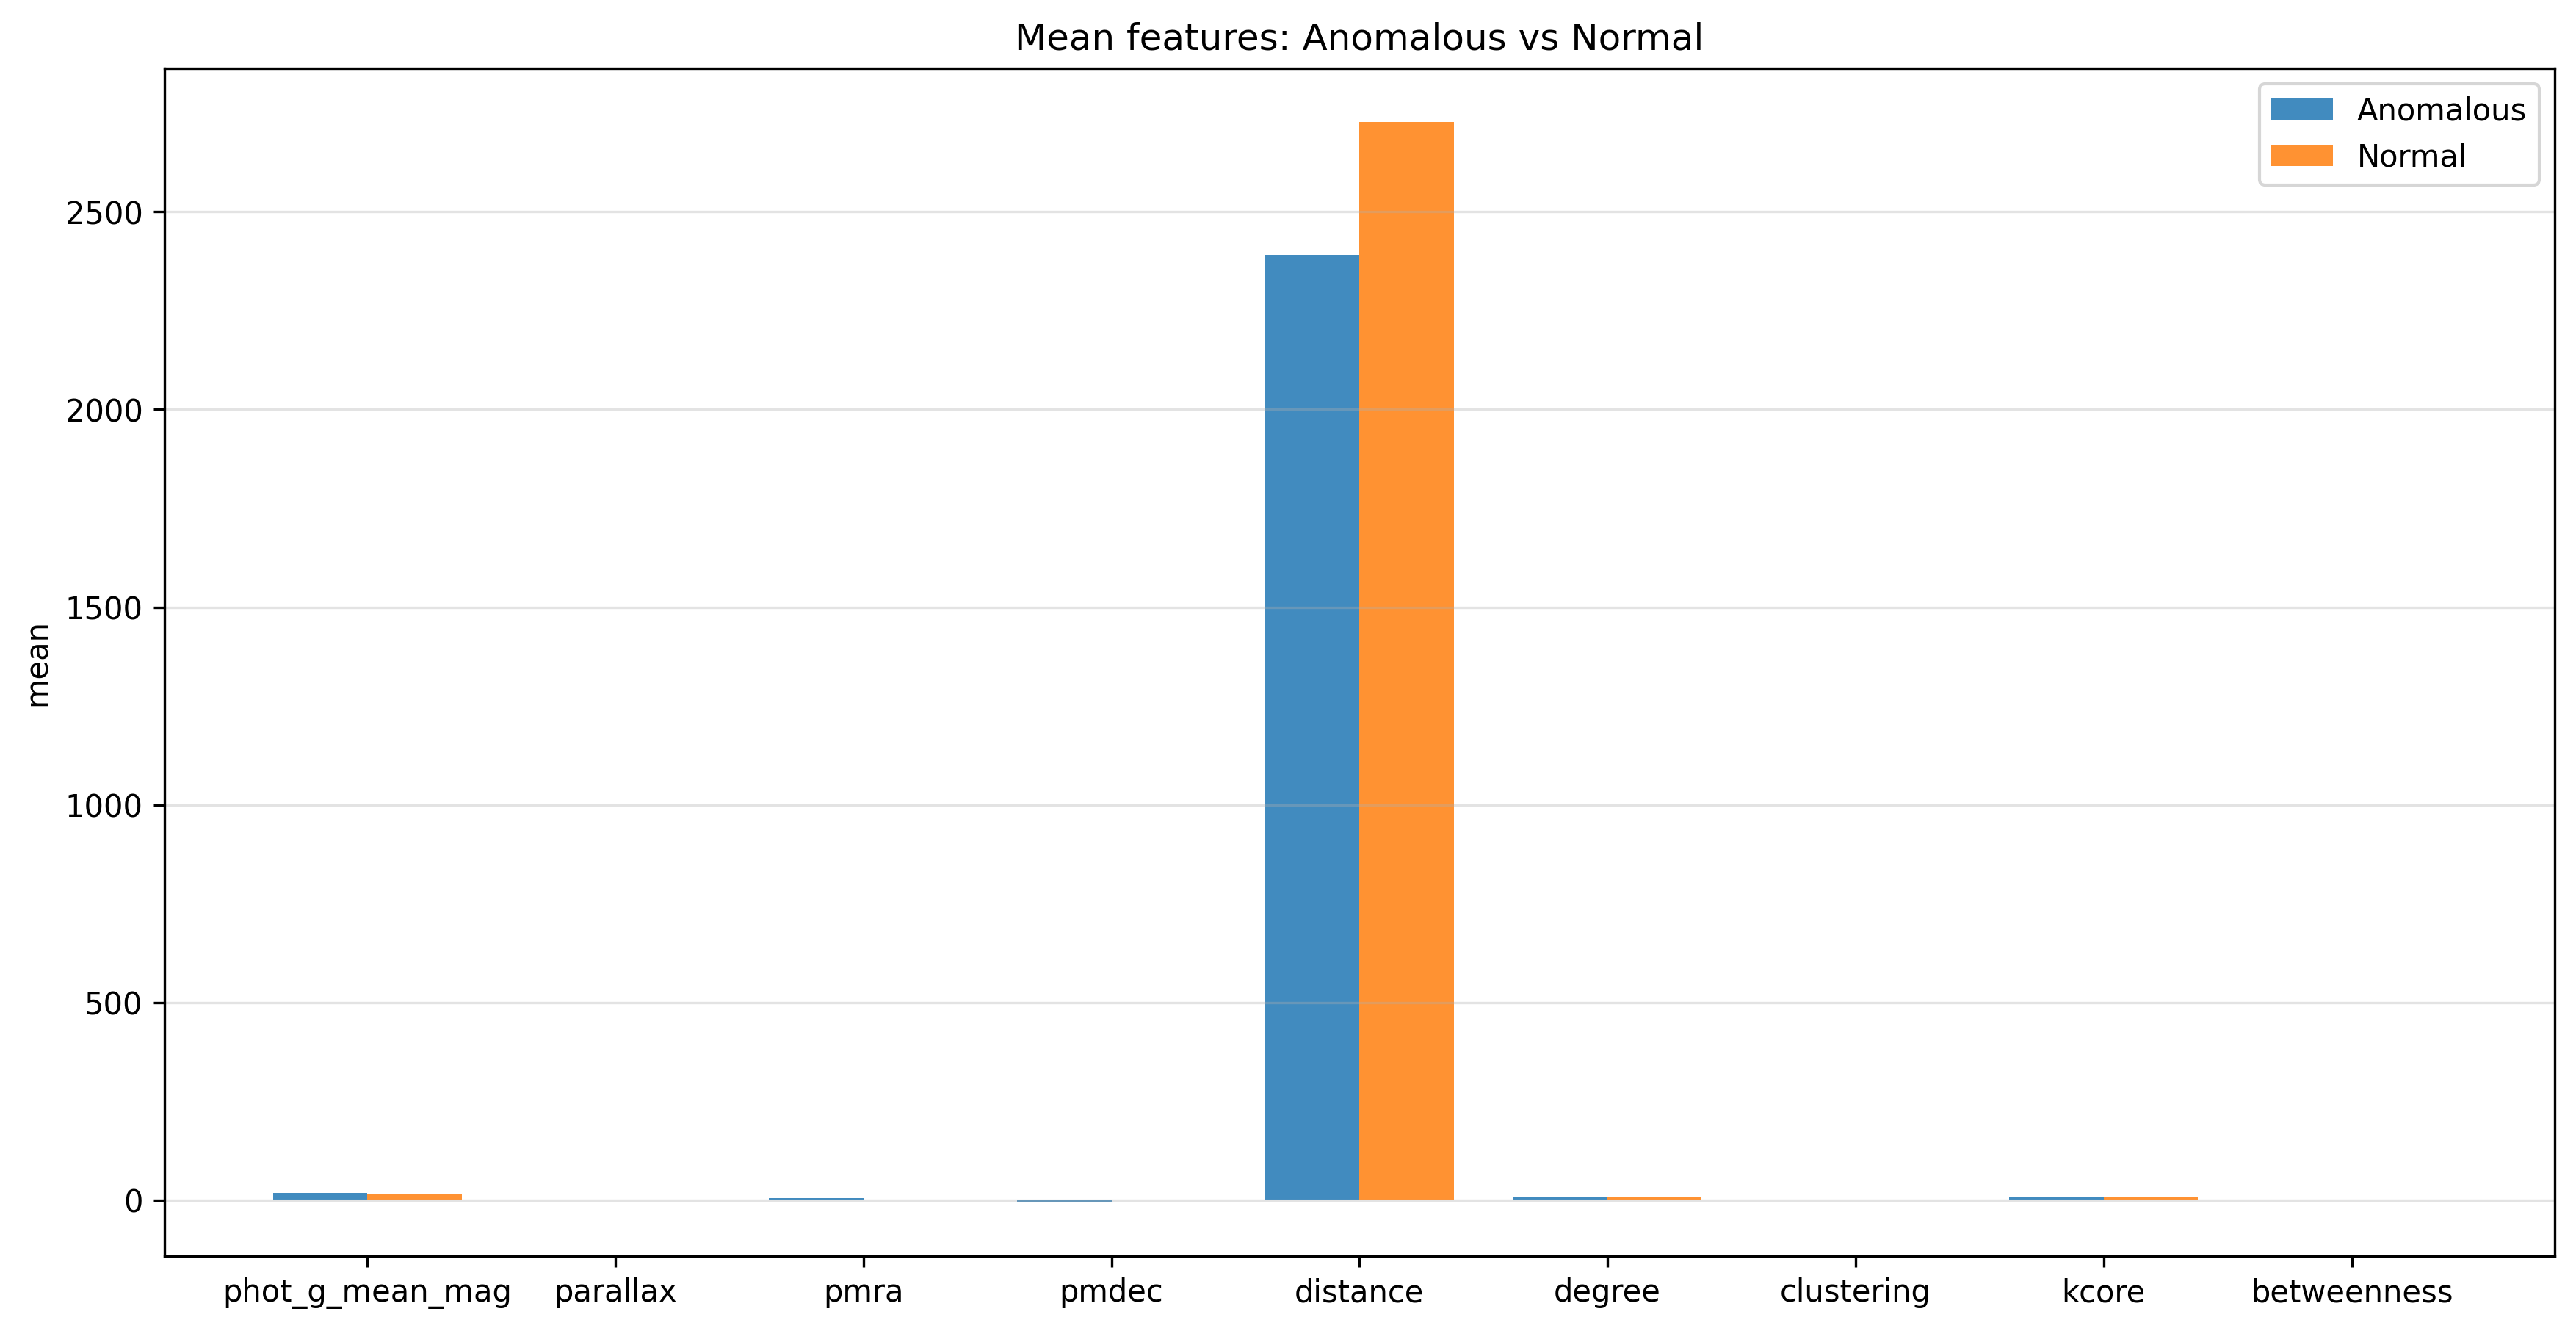

In [6]:
# Preview a subset
from pathlib import Path
from IPython.display import Image, display
p = Path('results/showcase_run/plots')
for name in ['graph_communities_anomalies.png','ra_dec_score.png','cmd_bp_rp_vs_g.png','pca_2d.png','top_anomalies_scores.png','mean_features_anom_vs_normal.png']:
    f = p/name
    if f.exists():
        display(Image(filename=str(f)))
